In [1]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv("C:\\datasets\\NLP\\twitter_training.csv")
df1 = pd.read_csv("C:\\datasets\\NLP\\twitter_validation.csv")

In [7]:
column_name=['tweetID','entity','sentiment','tweet_content']
df.columns=column_name
df1.columns=column_name
twitts=pd.concat([df,df1],ignore_index=False)
twitts.head()

,tweetID,entity,sentiment,tweet_content
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [8]:
# show the names of the columns in our dataframe

twitts.columns.tolist()

['tweetID', 'entity', 'sentiment', 'tweet_content']

In [10]:
#the info for eac column
#info content:(name of column,nonnull values in the data,type of the column)
twitts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75680 entries, 0 to 998
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tweetID        75680 non-null  int64 
 1   entity         75680 non-null  object
 2   sentiment      75680 non-null  object
 3   tweet_content  74994 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.9+ MB


# Cleaning data


**check the null values of the data:

In [11]:
twitts.isnull().sum()

tweetID            0
entity             0
sentiment          0
tweet_content    686
dtype: int64

In [12]:
# checking duplicated data

twitts.duplicated().sum()

3216

**Remove the null values and duplicated values:**
**Then check for the cleaning**

In [13]:
twitts.dropna(inplace=True)
twitts.drop_duplicates(inplace=True)
print("null values:","\n",twitts.isnull().sum())
print("duplicated values :",twitts.duplicated().sum())

null values: 
 tweetID          0
entity           0
sentiment        0
tweet_content    0
dtype: int64
duplicated values : 0


# Drop the unneded columns:

In [14]:
twitts.drop(columns=['tweetID','tweet_content'],inplace=True)
twitts.head()

,entity,sentiment
0,Borderlands,Positive
1,Borderlands,Positive
2,Borderlands,Positive
3,Borderlands,Positive
4,Borderlands,Positive


In [15]:
twitts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72138 entries, 0 to 995
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   entity     72138 non-null  object
 1   sentiment  72138 non-null  object
dtypes: object(2)
memory usage: 1.7+ MB


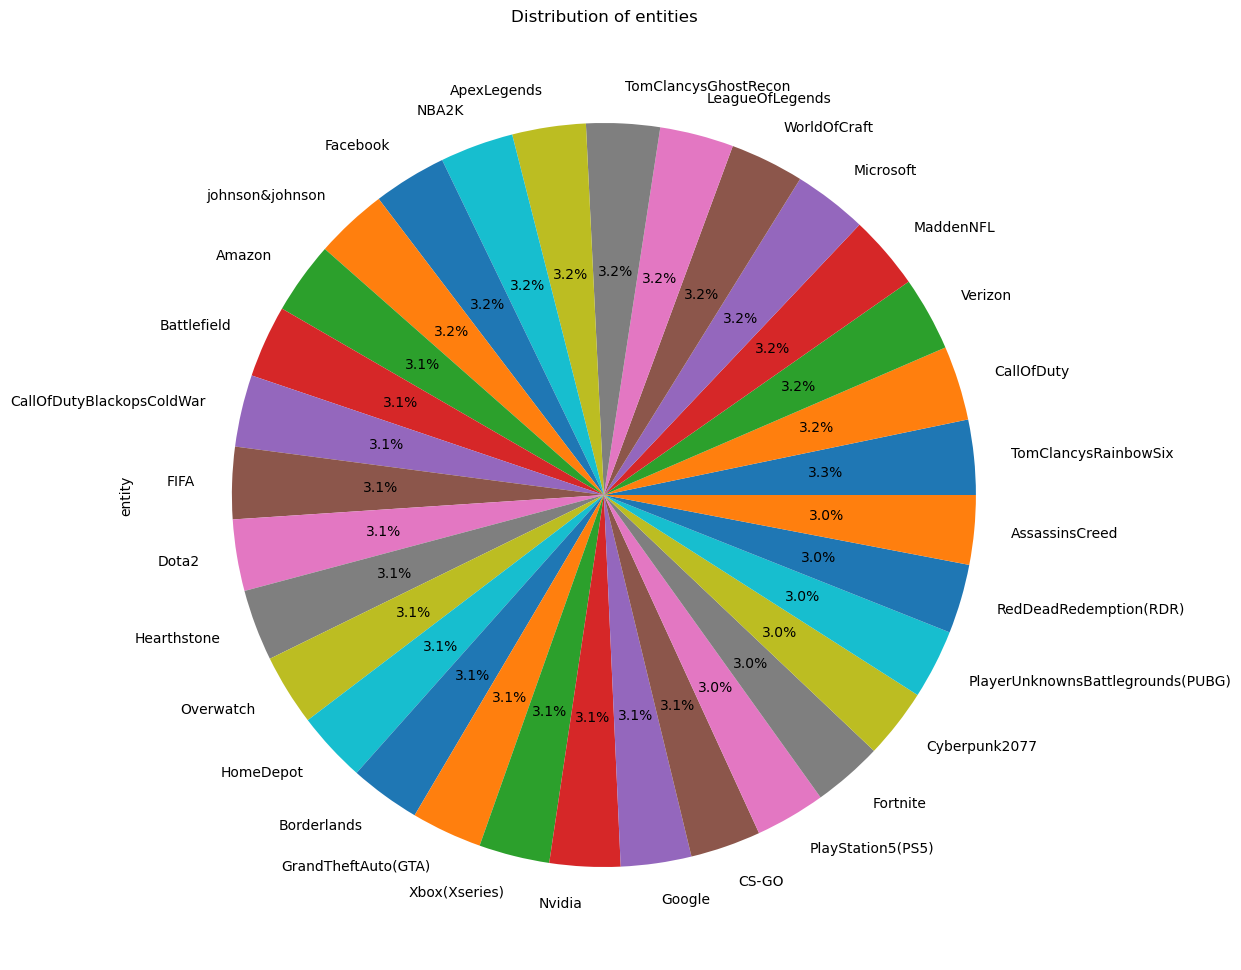

In [31]:
import matplotlib.pyplot as plt

entity_content=twitts['entity'].value_counts()
entity_content.plot(kind='pie', autopct='%1.1f%%', figsize=(12, 16))
plt.title('Distribution of entities')

plt.show()

 * we can see from the above plot the entities of the tweets are mostly esquals

<Axes: >

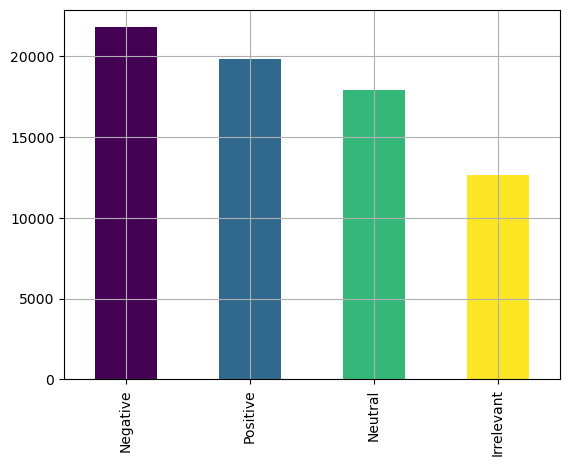

In [24]:
sentiment_content=twitts['sentiment'].value_counts()
color=plt.get_cmap('viridis')
colors = [color(i) for i in np.linspace(0, 1, len(sentiment_content))]
sentiment_content.plot(kind='bar',color=colors,grid=True)

*at the above figure we can see the number of the negative reactions are above to 20000
*the min number of the reactions are the number of the irrelevant reactions are less than 15000

<Axes: xlabel='entity'>

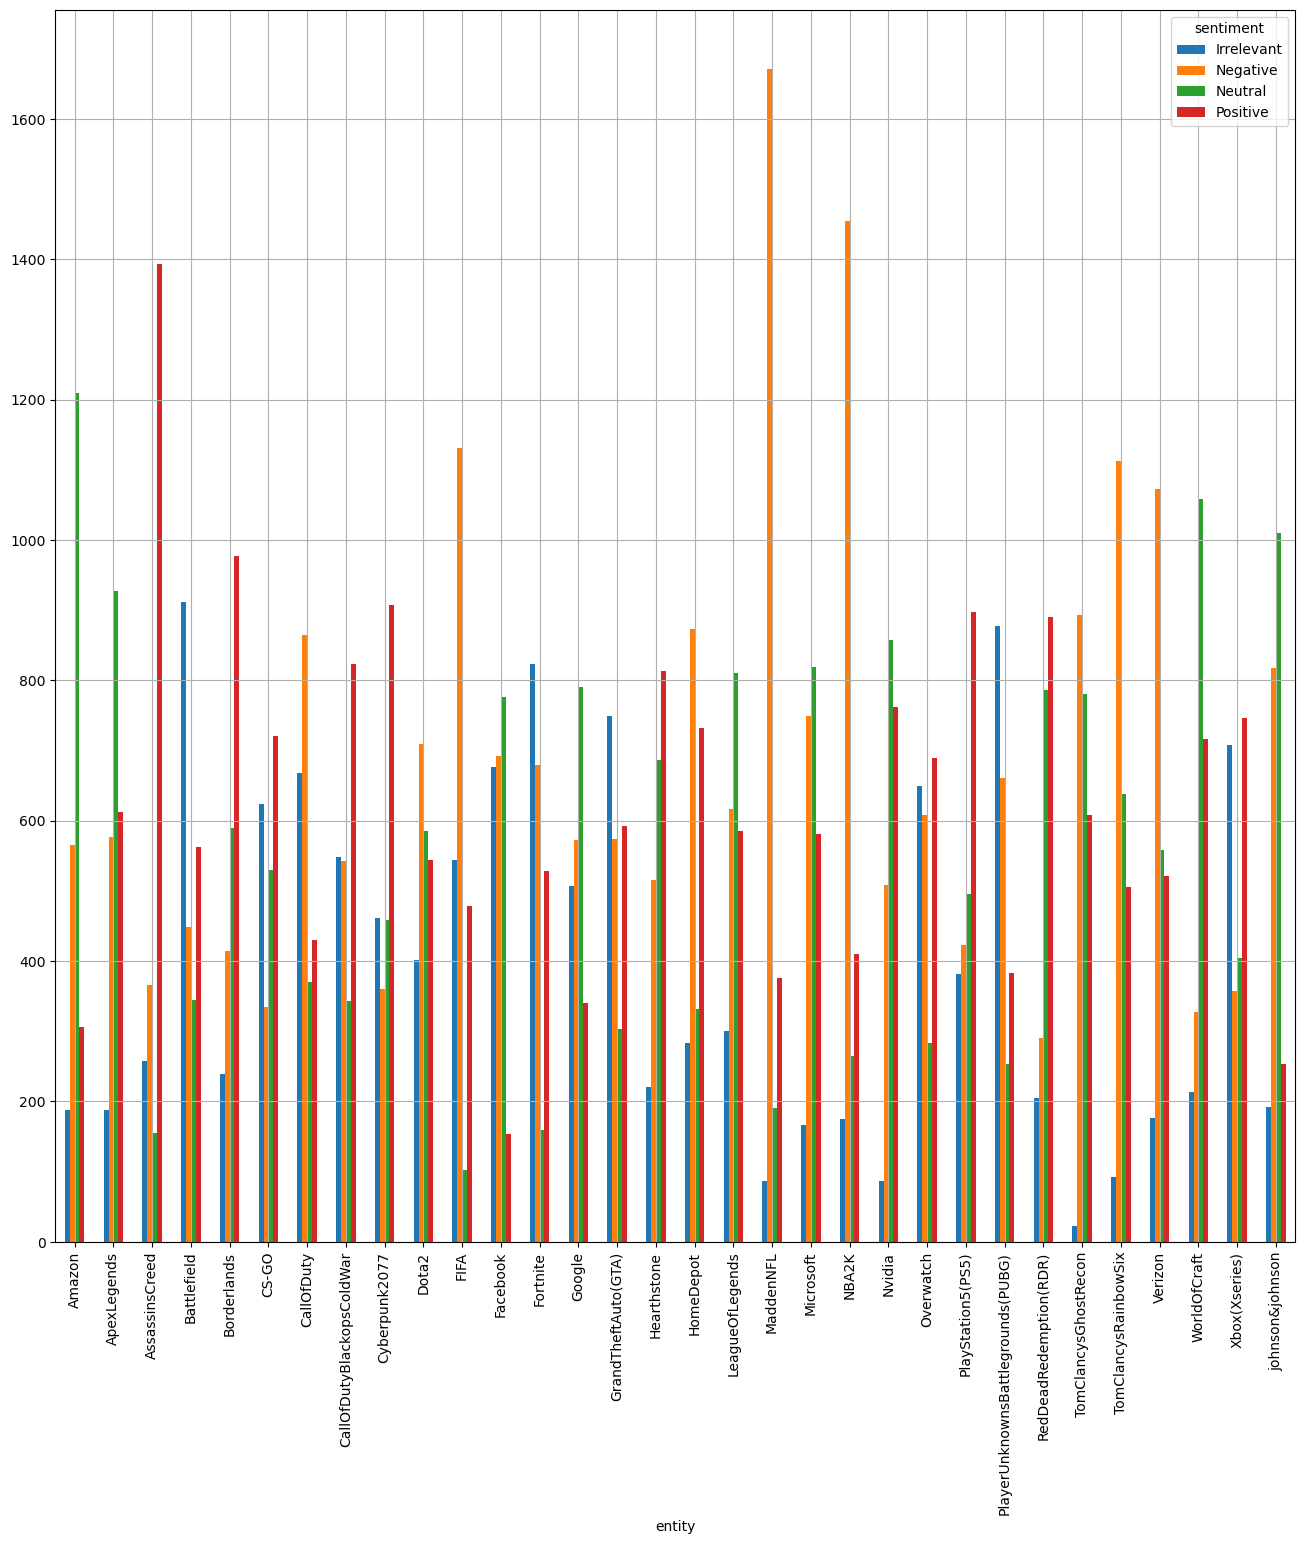

In [30]:
reaction_entities = pd.crosstab(twitts['entity'],twitts['sentiment'])
reaction_entities.plot(kind='bar', figsize=(16,16),grid=True)

*From the above figure the highest negative reactions in the MaddenNFL entity


*The highest irrelevant reactions in the Battlefield entity


*The highest neutral reactions in the Amazon entity


*The highest positive reactions in the AssassinsCreed entity